In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Q1. Write a function that simulates this game for 𝑁 rounds, where each round consists of betting 1 dollar on black. The function should return your total earnings 𝑆n after N rounds

In [3]:
def roulette_simulation(N):
    total_earnings = 0
    for _ in range(N):
        spin = random.randint(0, 37) 
        if 1 <= spin <= 18: 
            total_earnings += 1
        else:  
            total_earnings -= 1
    return total_earnings


In [4]:
N = 1000
total_earnings = roulette_simulation(N)
print(f"Total earnings after {N} rounds: {total_earnings} dollars")

Total earnings after 1000 rounds: -32 dollars


probability distributon of random variable X:

X = +1 with probability 18/38 (winning by landing on black).

X = −1 with probability 20/38 (losing by landing on red or green).

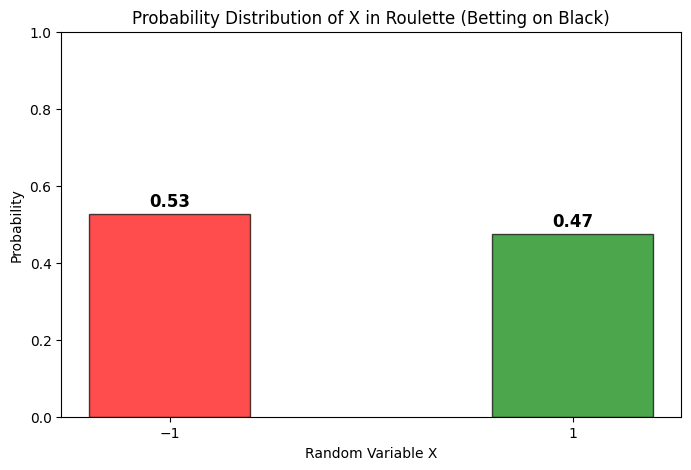

In [33]:
import matplotlib.pyplot as plt

X_values = [1, -1]  # +1 for winning, -1 for losing
probabilities = [18/38, 20/38]  # Probabilities for winning and losing

plt.figure(figsize=(8, 5))
plt.bar(X_values, probabilities, color=['green', 'red'], alpha=0.7, edgecolor='black')

plt.xlabel("Random Variable X")
plt.ylabel("Probability")
plt.title("Probability Distribution of X in Roulette (Betting on Black)")
plt.xticks(X_values)

for i, prob in enumerate(probabilities):
    plt.text(X_values[i], prob + 0.02, f"{prob:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 1)
plt.show()


calculating the population mean and population std (theoretical):

In [5]:
import numpy as np

X_values = np.array([1, -1])  
probabilities = np.array([18/38, 20/38]) 

# Compute the expected value E(X)
population_mean = np.sum(X_values * probabilities)

# Compute E(X^2)
expected_X2 = np.sum(X_values**2 * probabilities)

# Compute variance Var(X) = E(X^2) - [E(X)]^2
variance = expected_X2 - population_mean**2

population_std = np.sqrt(variance)

print(f"Theoretical Mean (E[X]): {population_mean:.4f}")
print(f"Theoretical Variance (Var[X]): {variance:.4f}")
print(f"Theoretical Standard Deviation (σ[X]): {population_std:.4f}")


Theoretical Mean (E[X]): -0.0526
Theoretical Variance (Var[X]): 0.9972
Theoretical Standard Deviation (σ[X]): 0.9986


In [6]:
def monte_carlo_simulation_earnigs(N, simulations):
    earnings = []
    for _ in range(simulations):
        earn = roulette_simulation(N) 
        earnings.append(earn)

    return np.array(earnings)

### Q4. Calculate the theoretical expected values and standard errors of 𝑆n for each N, and compare these theoretical values with your Monte Carlo simulation results. Report any differences between the theoretical and simulated values for each 𝑁.

#### theoretical mean and standard errors for different values of N, for Sn :

Sn = X1 + X2 + X3 + ... + XN

Mean of the sum (Sn):
E[Sn] = E[X1] + E[X2] + ... + E[XN] = N * μ 

Standard deviation of the sum (Sn):
σ_Sn = sqrt(N) * σ

In [36]:
import math

def calculate_mean_std_sample_SN(N):
    sample_mean = N * population_mean
    sample_std = math.sqrt(N) * population_std
    
    print("theoretical sample mean : ", sample_mean, " and theoretical sample std: ", sample_std)

N_values = [10, 25, 100, 1000]

for N in N_values:
    calculate_mean_std_sample_SN(N)

theoretical sample mean :  -0.5263157894736842  and theoretical sample std:  3.1578947368421053
theoretical sample mean :  -1.3157894736842104  and theoretical sample std:  4.9930699897395465
theoretical sample mean :  -5.263157894736842  and theoretical sample std:  9.986139979479093
theoretical sample mean :  -52.63157894736842  and theoretical sample std:  31.57894736842105


### Q2. Use Monte Carlo simulation to study the distribution of total earnings 𝑆n for N = 10, 25, 100, 1000. For each 𝑁, simulate 100,000 rounds and plot the distribution of total earnings. Analyze whether the distributions appear similar to a normal distribution and observe how the expected values and standard errors change with N.


N = 10: Mean = -0.52266, SE = 3.1477843834036663, Min = -10, Max = 10
N = 25: Mean = -1.31724, SE = 4.972387633964191, Min = -21, Max = 19
N = 100: Mean = -5.24556, SE = 10.02188905777748, Min = -46, Max = 38
N = 1000: Mean = -52.45352, SE = 31.58331330955636, Min = -182, Max = 100


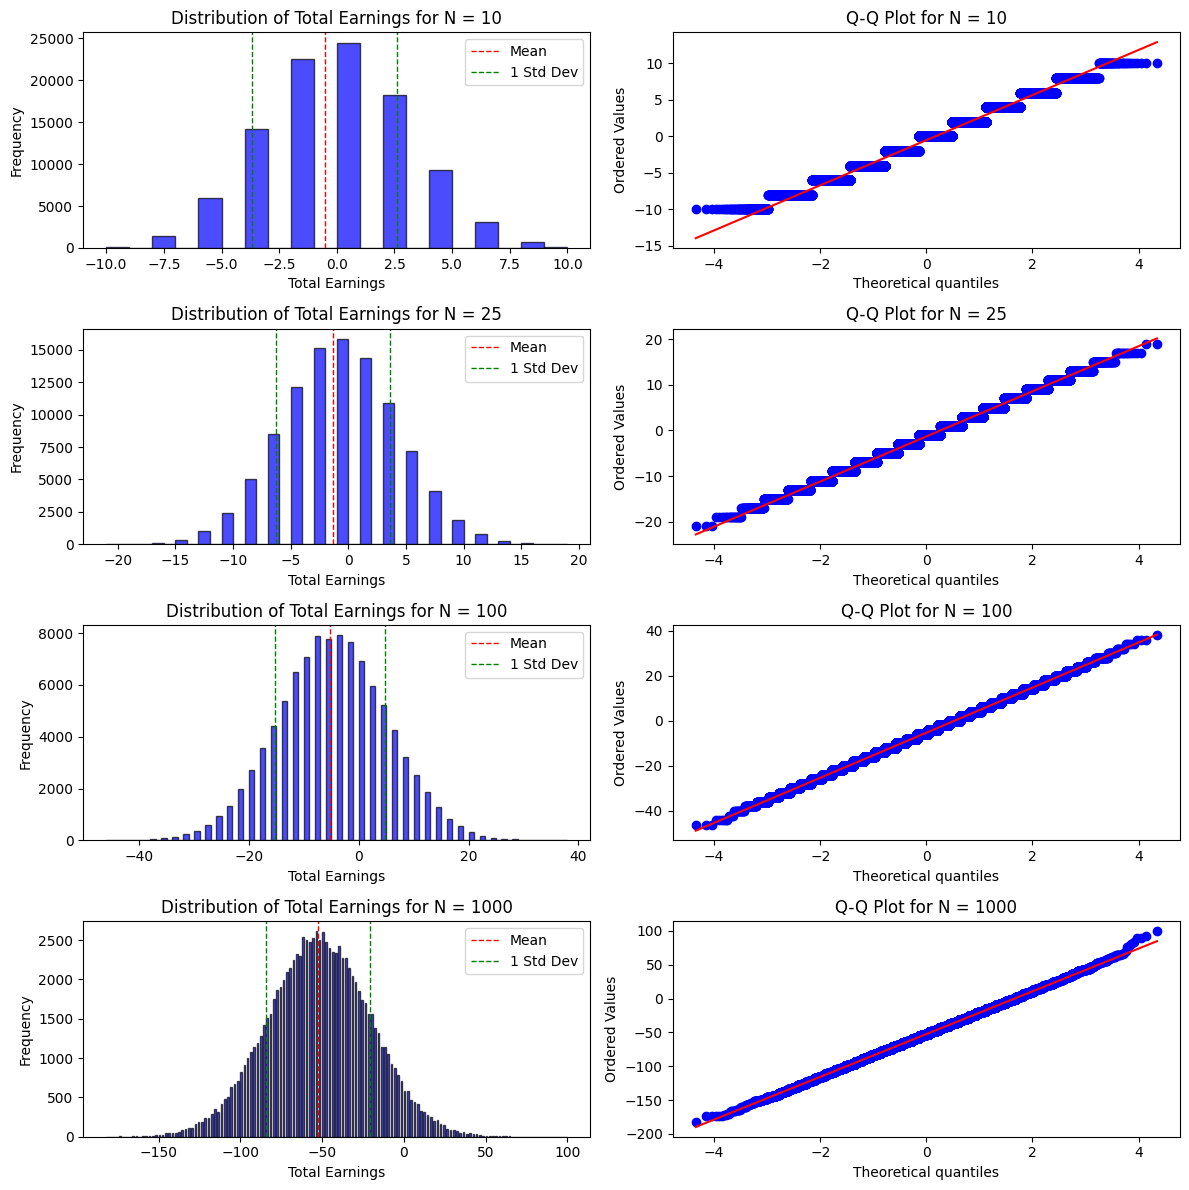

In [37]:
N_values = [10, 25, 100, 1000]
simulations = 100000

plt.figure(figsize=(12, 12))

for i, N in enumerate(N_values):
    earnings = monte_carlo_simulation_earnigs(N, simulations)
    
    mean = np.mean(earnings)
    std_dev = np.std(earnings)
    min_val = np.min(earnings)
    max_val = np.max(earnings)
    print(f"N = {N}: Mean = {mean}, SE = {std_dev}, Min = {min_val}, Max = {max_val}")

    plt.subplot(4, 2, 2 * i + 1)
    bin_width = 1
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    plt.hist(earnings, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of Total Earnings for N = {N}')
    plt.xlabel('Total Earnings')
    plt.ylabel('Frequency')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1, label='1 Std Dev')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1)
    plt.legend()
    
    plt.subplot(4, 2, 2 * i + 2)
    stats.probplot(earnings, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for N = {N}')

plt.tight_layout()
plt.show()


### Q3. Repeat the previous simulation but for the average winnings Sn / N instead of Sn. For each N, plot the distribution of average winnings and examine the changes in expected values and standard errors with different values of 𝑁. (𝑁 = 10, 25, 100, 1000)


In [38]:
def monte_carlo_simulation_average_wins(N, simulations):
    average_wins = []
    for _ in range(simulations):
        earn = roulette_simulation(N) 
        average_win = earn / N
        average_wins.append(average_win)

    return np.array(average_wins)

N = 10: Mean = -0.052482, SE = 0.31469038700919993, Min = -1.0, Max = 1.0
N = 25: Mean = -0.051663200000000006, SE = 0.1991861083654179, Min = -0.76, Max = 0.76
N = 100: Mean = -0.052531400000000006, SE = 0.09965681117736008, Min = -0.44, Max = 0.36
N = 1000: Mean = -0.052614120000000014, SE = 0.03162281670923069, Min = -0.186, Max = 0.096


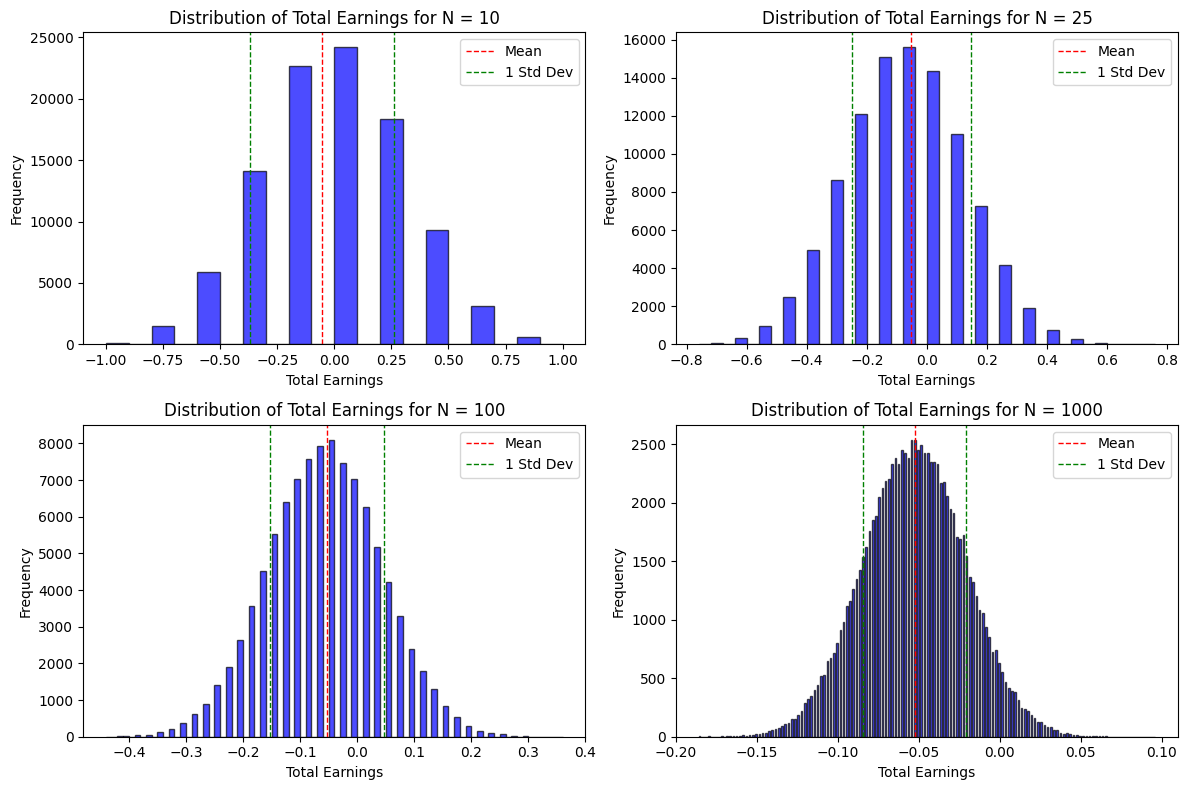

In [40]:
N_values = [10, 25, 100, 1000] #sample size
simulations = 100000

plt.figure(figsize=(12, 8))

for N in (N_values):
    earnings = monte_carlo_simulation_average_wins(N, simulations)
    
    mean = np.mean(earnings)
    std_dev = np.std(earnings)
    min_val = np.min(earnings)
    max_val = np.max(earnings)
    print(f"N = {N}: Mean = {mean}, SE = {std_dev}, Min = {min_val}, Max = {max_val}")

    plt.subplot(2, 2, N_values.index(N)+1)
    bin_width = 1/N
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    plt.hist(earnings, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of Total Earnings for N = {N}')
    plt.xlabel('Total Earnings')
    plt.ylabel('Frequency')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1, label='1 Std Dev')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1)
    plt.legend()

plt.tight_layout()
plt.show()

#### theoretical mean and standard errors for different values of N, for Sn / N:

X̄ = (X1 + X2 + X3 + ... + XN) / N

Mean of the sample mean (X̄):
E[X̄] = (N * μ) / N = μ

Standard deviation of the sample mean (Standard Error):
σ_X̄ = σ / sqrt(N)

In [7]:
import math

def calculate_mean_std_sample_X̄(N):
    sample_mean = population_mean
    sample_std = population_std / math.sqrt(N)
    
    print("theoretical sample mean : ", sample_mean, " and theoretical sample std: ", sample_std)

N_values = [10, 25, 100, 1000]

for N in N_values:
    calculate_mean_std_sample_X̄(N)

theoretical sample mean :  -0.05263157894736842  and theoretical sample std:  0.3157894736842105
theoretical sample mean :  -0.05263157894736842  and theoretical sample std:  0.19972279958958186
theoretical sample mean :  -0.05263157894736842  and theoretical sample std:  0.09986139979479093
theoretical sample mean :  -0.05263157894736842  and theoretical sample std:  0.031578947368421054


### Q5. Use the Central Limit Theorem (CLT) to approximate the probability that the casino loses money when you play 𝑁 = 25 rounds, and verify this approximation using a Monte Carlo simulation.


### compute the probability using the normal distribution:
We need to find: P(Sn > 0) =1-P(Sn <= 0)

Using the cumulative distribution function (CDF) of normal distribution: 

P(Sn <=0) = CDF of normal(0,μs, ϕs)

P(Sn <=0) = Φ( (0-(-1.315))/4.993) = Φ(0.2634) ->here we use theoretical mean and std for Sn by playing 25 rounds which we computed before

Using a standard normal table: Φ(0.2634) ~ 0.6039 

So: P(Sn > 0) =1-0.6039=0.3961

### Compute the Probability from the Simulation:

In [13]:
def monte_carlo_simulation_win_probabilty(N, simulations):
    number_of_wins = 0
    for _ in range(simulations):
        number_of_wins += (roulette_simulation(N) > 0)

    return number_of_wins / simulations

casino_loses_money_probability = monte_carlo_simulation_win_probabilty(25, 100000) 

print(f"the Monte Carlo simulation gives a probability of {casino_loses_money_probability} that the casino loses money after 25 rounds.")

the Monte Carlo simulation gives a probability of 0.39434 that the casino loses money after 25 rounds.


### Q6. Plot the probability that the casino loses money as a function of 𝑁 for values 𝑁 ranging from 25 to 1000. Discuss why casinos might encourage players to continue betting in light of these results.

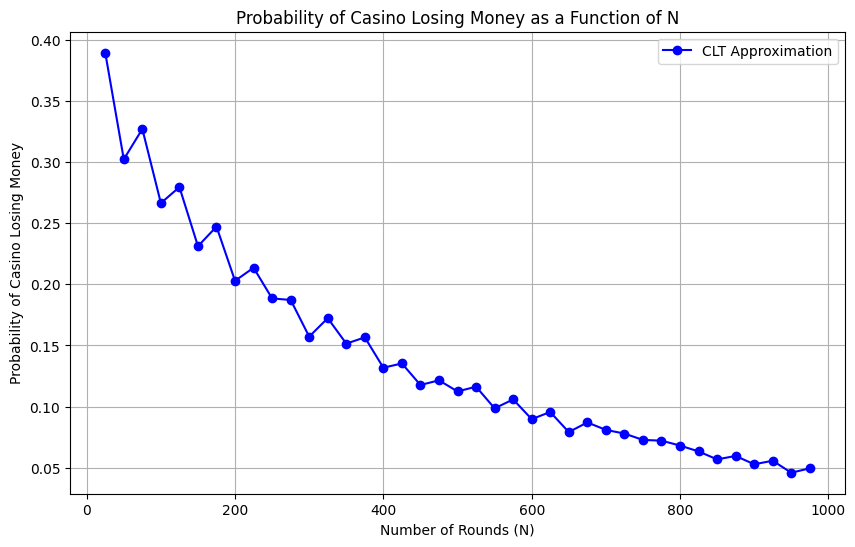

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


N_values = np.arange(25, 1000, 25) 

simulations = 10000

prob_casino_loss = []
for N in N_values:
    casino_loses_money_probability = monte_carlo_simulation_win_probabilty(N, simulations)
    prob_casino_loss.append(casino_loses_money_probability)

plt.figure(figsize=(10, 6))
plt.plot(N_values, prob_casino_loss, marker='o', linestyle='-', color='b', label="CLT Approximation")
plt.xlabel("Number of Rounds (N)")
plt.ylabel("Probability of Casino Losing Money")
plt.title("Probability of Casino Losing Money as a Function of N")
plt.legend()
plt.grid(True)
plt.show()
